In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Sahil\Downloads\tweet_sentiment.csv")

In [3]:
df.head()

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


In [4]:
df['sentiment'].value_counts()

sentiment
positive    396
neutral     317
negative    287
Name: count, dtype: int64

In [5]:
df.isnull().sum()

tweet        0
sentiment    0
dtype: int64

In [6]:
import nltk

In [7]:
df['tweet'].apply(len)

0      25
1      27
2      21
3      21
4      29
       ..
995    20
996    22
997    28
998    23
999    27
Name: tweet, Length: 1000, dtype: int64

In [8]:
df['num_chr'] = df['tweet'].apply(len)

In [9]:
df['num_words'] = df['tweet'].apply(lambda x:len(nltk.word_tokenize(x)))

In [10]:
df.head()

,tweet,sentiment,num_chr,num_words
0,The event starts at 5 PM.,neutral,25,7
1,I hate how this turned out.,negative,27,7
2,Fantastic experience!,positive,21,3
3,Fantastic experience!,positive,21,3
4,This is the worst thing ever!,negative,29,7


In [11]:
df[['num_words','num_chr']].describe()

,num_words,num_chr
count,1000.000000,1000.000000
mean,5.686000,24.608000
std,1.321798,4.524025
min,3.000000,17.000000
25%,5.000000,21.000000
50%,6.000000,24.000000
75%,7.000000,27.000000
max,8.000000,35.000000


<Axes: xlabel='num_chr', ylabel='Count'>

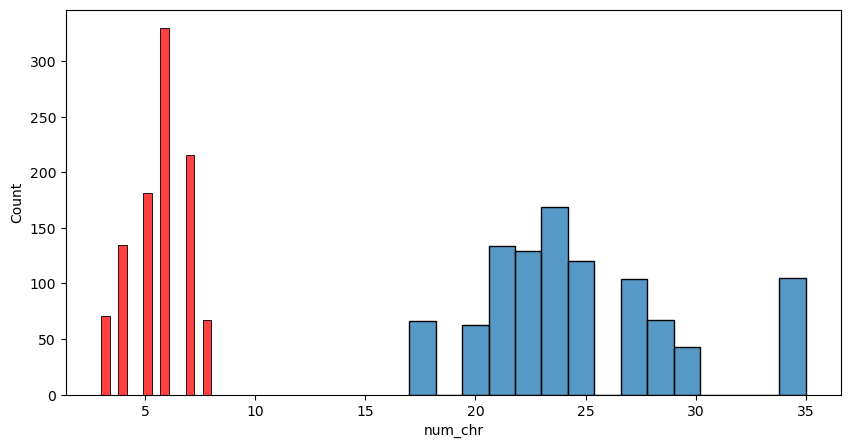

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['num_chr'])
sns.histplot(df['num_words'] , color= 'r')

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['tweet'],df['sentiment'],test_size=0.3,random_state=5)

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [15]:
classifier = Pipeline([('tfidf' , TfidfVectorizer()), ('classifer' , RandomForestClassifier(n_estimators=100))])

In [16]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifer', RandomForestClassifier())])

In [17]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [18]:
def acc(y_pred , y_test):
  print(accuracy_score(y_pred , y_test))
  print(classification_report(y_pred , y_test))
  print(confusion_matrix(y_pred , y_test))

In [19]:
y_pre = classifier.predict(x_test)

In [20]:
acc(y_pre , y_test)

1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        86
     neutral       1.00      1.00      1.00        93
    positive       1.00      1.00      1.00       121

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[ 86   0   0]
 [  0  93   0]
 [  0   0 121]]


In [23]:
classifier.predict(['It was an awesome experience'])

array(['positive'], dtype=object)